## Exercise 3, decision trees and random forests

Goal of the exercise is to construct a decision tree and a random forest model to evaluate whether a given site is a phishing website or not using the https://archive.ics.uci.edu/dataset/327/phishing+websites dataset

# Part 1: Decision Tree

## Training the model 
First we train the model using our dataset, which can be handily imported to python and is is in a relatively accessible format and in good form (ie. we do not need to drop any tables with missing values, etc.):

In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
  
phishing_websites = fetch_ucirepo(id=327) 
  
X = phishing_websites.data.features 
y = phishing_websites.data.targets 

  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set

model = DecisionTreeClassifier(max_depth = 4, random_state=20)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=20)

We are left with a DecisionTreeClassifier with a max_depth of 4, testing showed it to be a good compromise between usability and accuracy

Then we plot our decision tree below:



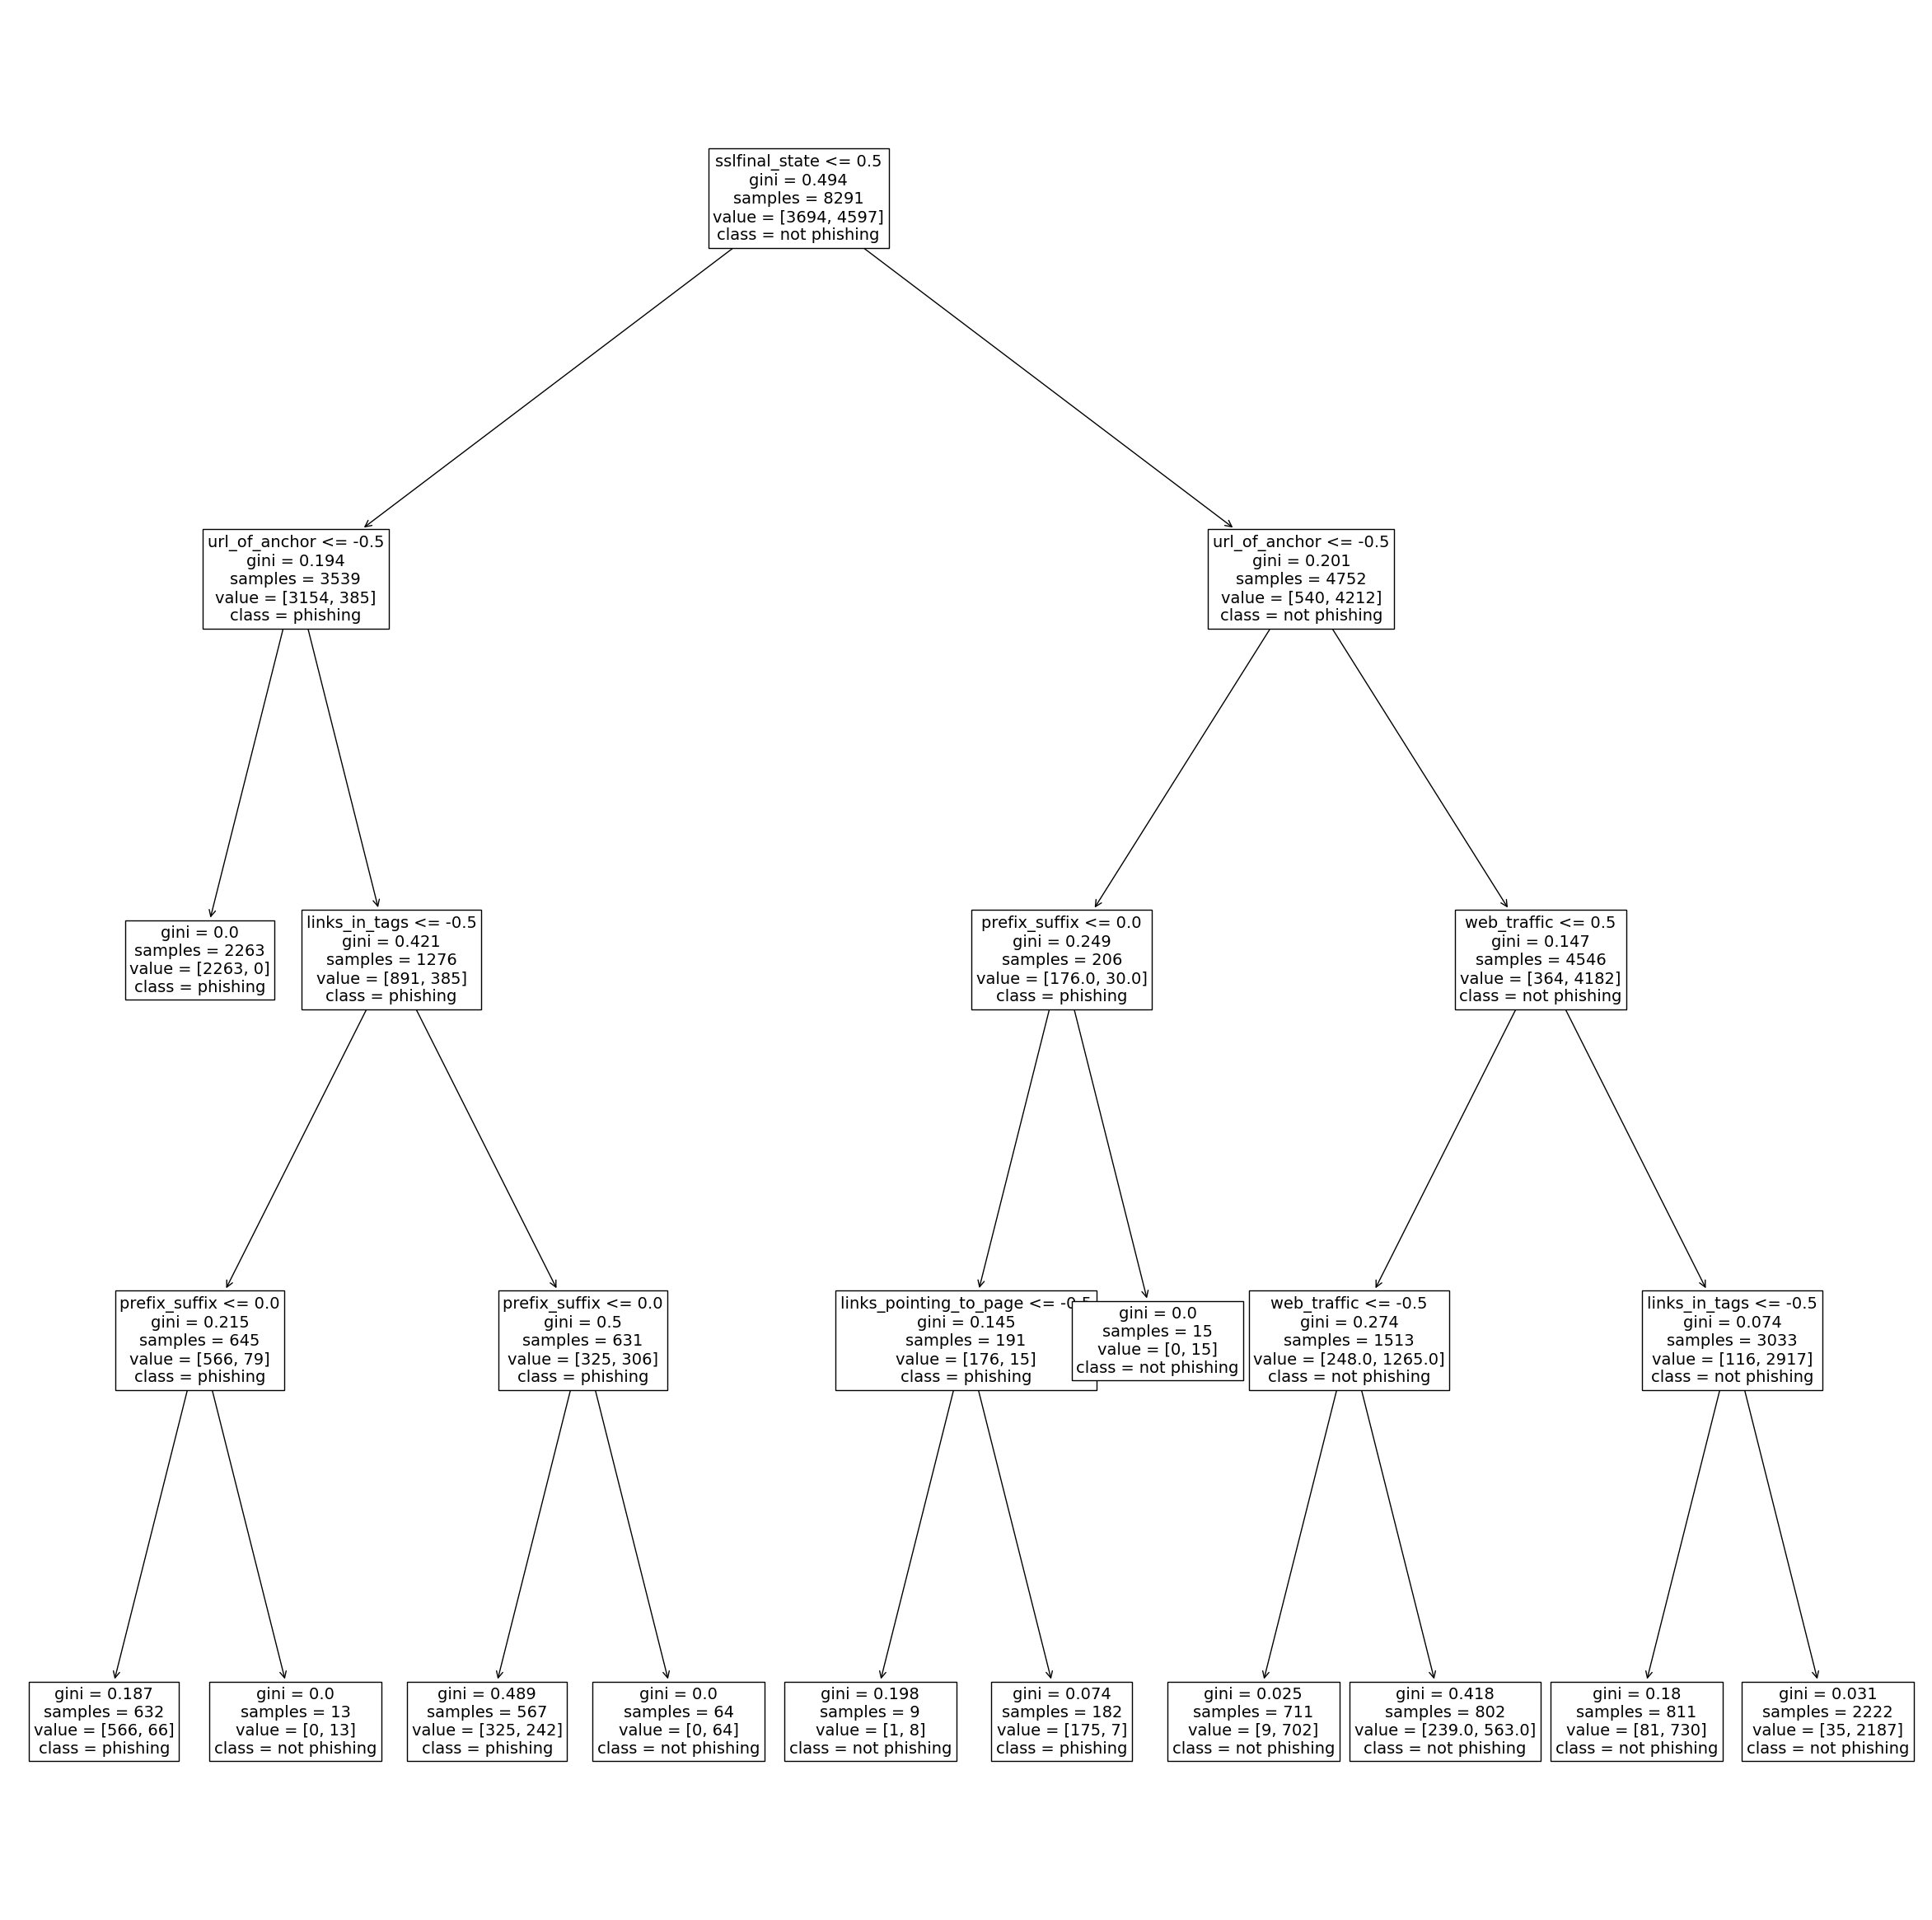

In [5]:

fig = plt.figure(figsize = (30, 30))
plot_tree(model, feature_names = X.keys(), class_names = ['phishing', 'not phishing'], fontsize=14)
plt.show()

## Instructions for use of Phishing Decision tree:

### 1 
First check whether the site uses HTTPS/SSL, if not, go to part 2.1, if it uses HTTPS/SSL, move to to 2.2

### 2.1

If over 67% of anchor urls (<a> elements) have an url that is not the domain url, mark site as PHISHING, otherwise move to 3.2

### 2.2

If over 67% of anchor urls (<a> elements) have an url that is not the domain url move to 3.3, otherwise move to 3.4

### 3.2

if over 81% of links in tags (meta,link, script) are not to current domain, move to 4.1, else to 4.2

### 3.3

If domain name includes a dash, move to 4.3, otherwise mark as NOT PHISHING

### 3.4

NOT PHISHING

### 4.1

If domain name includes a dash, mark as PHISHING, otherwise mark as NOT PHISHING

### 4.2

If domain name includes a dash, mark as PHISHING, otherwise mark as NOT PHISHING

### 4.3

If there are no links pointing to the page, mark as PHISHING, otherwise NOT PHISHING

### 4.5

NOT PHISHING

### 4.6

NOT PHISHING

In [7]:
from sklearn.metrics import confusion_matrix

preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[1094,  110],
       [ 118, 1442]], dtype=int64)

Testing our tree yields roughly a 92% accuracy of evaluation, as can be calculated from the above confusion matrix

## Pruning approach

Let's try the pruning approach: 

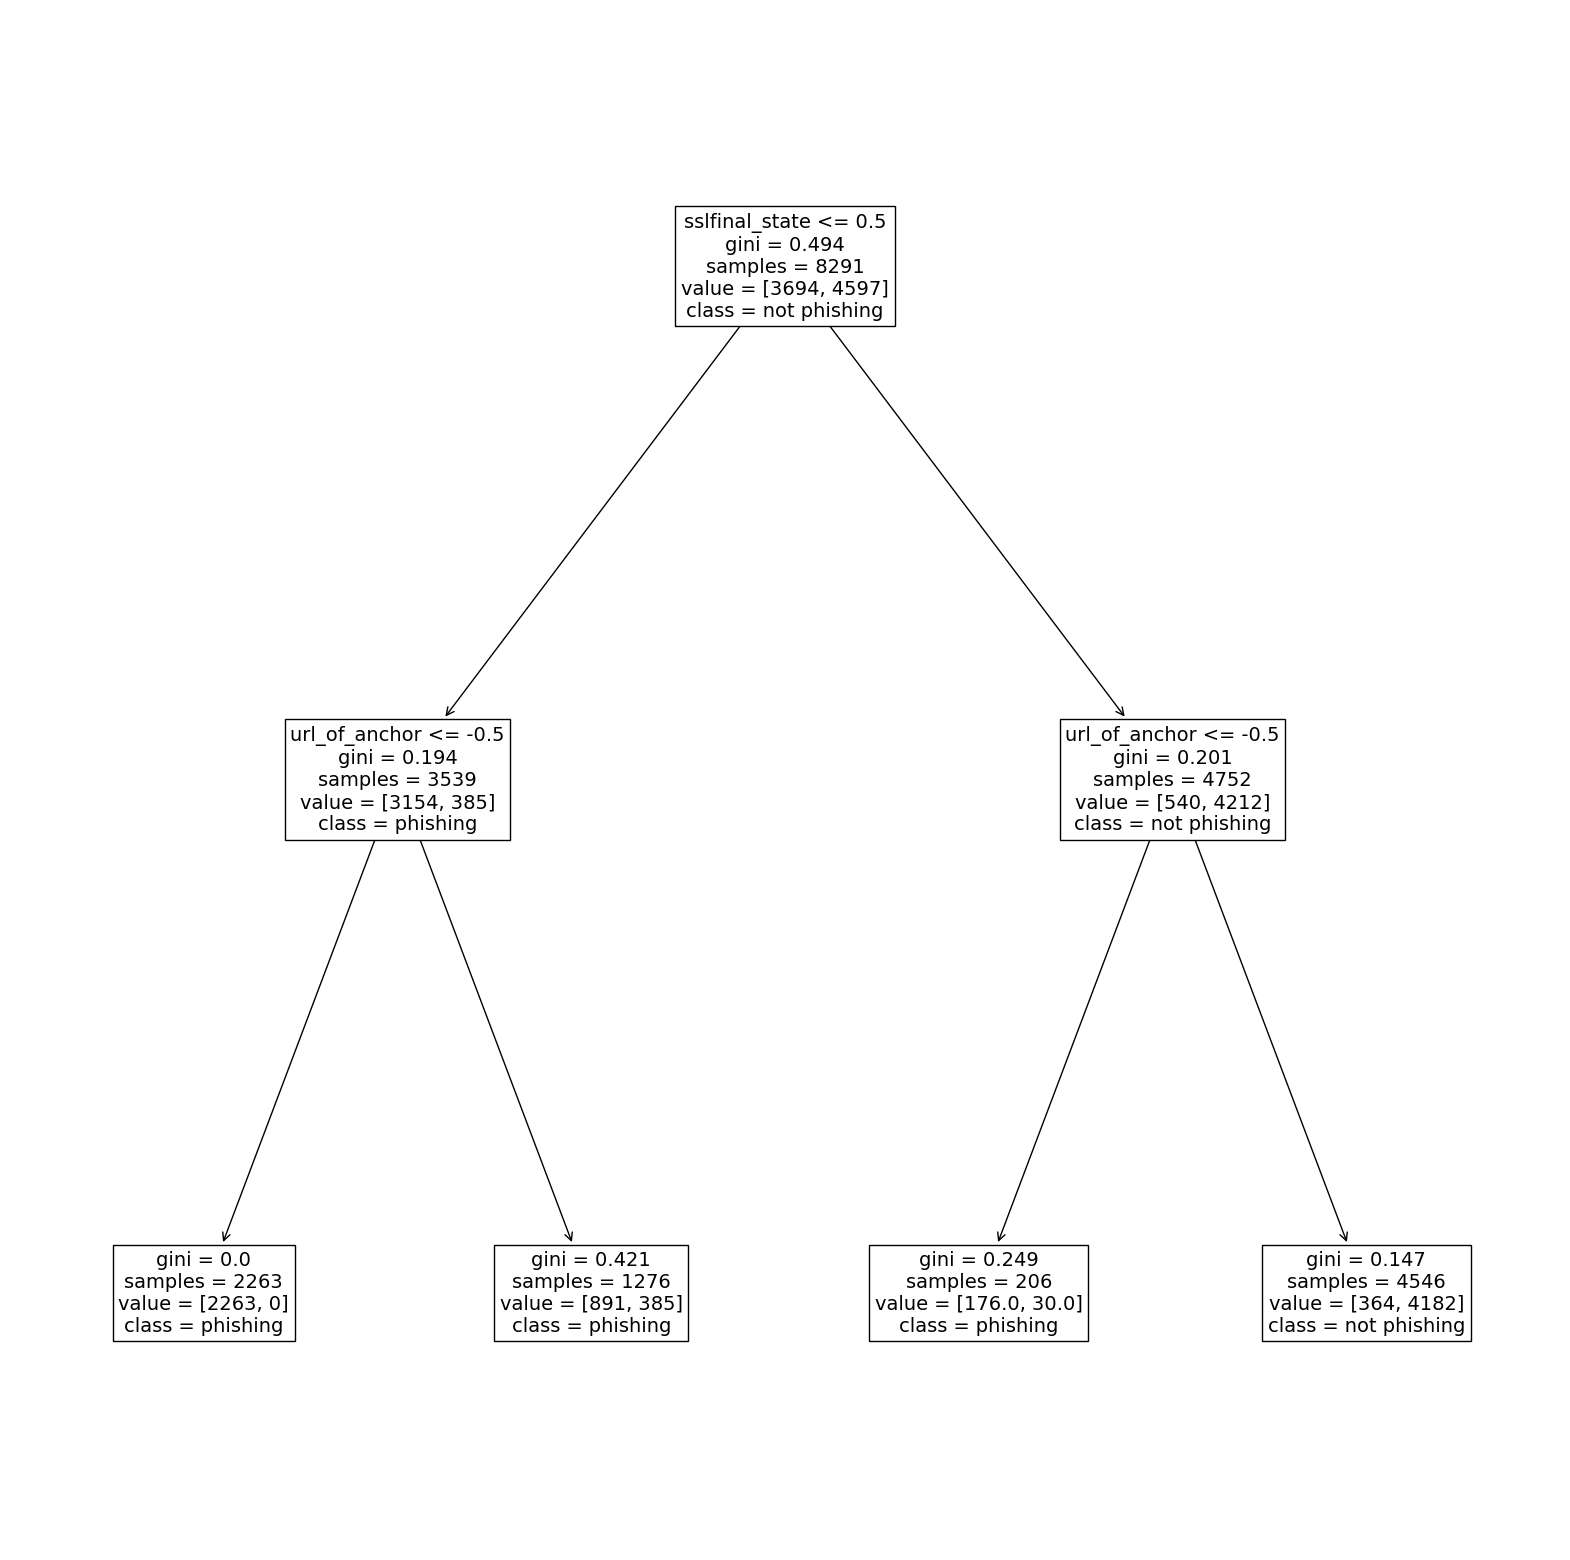

In [10]:
model_pruned = DecisionTreeClassifier(random_state=20, ccp_alpha=0.012).fit(X_train, y_train)
fig = plt.figure(figsize = (20, 20))
plot_tree(model_pruned, feature_names = X.keys(), class_names = ['phishing', 'not phishing'], fontsize=14)
plt.show()

In [11]:
preds_pruned = model_pruned.predict(X_test)
confusion_matrix(y_test, preds_pruned)

array([[1095,  109],
       [ 148, 1412]], dtype=int64)

The result is much more readable but in this instance a bit less accurate, so let's go with the 4 layer deep decision tree this time

# Part 2: Random forests

Here we try the random forest method: 

We create a RandomForestClassifier with the same data, then evaluate it using the cross_val_score dunction to carry out a 10-fold cross-validation. 

In [15]:
import numpy as np # we need good old numpy to simplify our data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# Create a random forest classifier
forestmodel = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)

z = np.ravel(y) #here we simplify our data
cv_scores = cross_val_score(forestmodel, X, z, cv=10)
print(f'Fold-specific accuracies: {cv_scores}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}')

Fold-specific accuracies: [0.98553345 0.98282098 0.97287523 0.98372514 0.97830018 0.97375566
 0.96108597 0.94298643 0.96289593 0.95837104]
Overall accuracy (avg. of folds): 0.9702


## Results

It seems we can gain quite a bit of accuracy using Random Forests, as our preliminary analysis seems to show prediction accuracy increasing from roughly 0.92 to roughly 0.97, which I feel is a significant increase for an acceptable computation cost. 

This is by no means a complete analysis and a lot of steps have been skipped (like we should have used atleast one more set of data to test the evaluation metrics), BUT is is a good learning experience.